In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from qbstyles import mpl_style; mpl_style(dark=True)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [2]:
nb_version = "v2"

In [3]:
df_train = pd.read_csv(f'../../data/processed/df_train_{nb_version}.csv', index_col=[0])
df_test = pd.read_csv(f'../../data/processed/df_test_{nb_version}.csv', index_col=[0])
display(f'Train: {df_train.shape}', df_train.head(), f'Test: {df_test.shape}', df_test.head())

'Train: (8400, 8)'

,index,output,Ia,Ib,Ic,Va,Vb,Vc
0,11295,0,0.507946,0.485907,0.501921,0.979928,0.360361,0.183003
1,2656,1,0.628969,0.016439,0.466456,0.479691,0.630965,0.401669
2,166,0,0.535125,0.482859,0.479751,0.647257,0.834051,0.018610
3,9307,1,0.064725,0.928054,0.499483,0.505443,0.540413,0.471228
4,11780,0,0.530485,0.506889,0.458602,0.531000,0.915372,0.049988


'Test: (3601, 8)'

,index,output,Ia,Ib,Ic,Va,Vb,Vc
0,6137,0,0.526886,0.482403,0.489649,0.833690,0.657394,0.017071
1,5081,1,0.490184,0.167233,0.842303,0.155195,0.493709,0.873432
2,8976,1,0.078685,0.480408,0.934757,0.474444,0.540888,0.501965
3,5319,1,0.520196,0.630375,0.348021,0.911821,0.543148,0.058840
4,1390,1,0.145420,0.500711,0.474726,0.323123,0.937912,0.235689


In [4]:
X_train = df_train.drop(['index','output'], axis=1)
Y_train = df_train['output']
X_test = df_test.drop(['index','output'], axis=1)
Y_test = df_test['output']

In [5]:
model_ann = Sequential()
model_ann.add(Dense(units=6, activation='relu', input_shape=(6,)))
model_ann.add(Dense(units=6, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 42        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [6]:
hist = model_ann.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
263/263 [==============================] - 6s 6ms/step - loss: 0.6596 - accuracy: 0.6290 - val_loss: 0.6267 - val_accuracy: 0.7067
Epoch 2/100
263/263 [==============================] - 1s 5ms/step - loss: 0.5931 - accuracy: 0.7080 - val_loss: 0.5653 - val_accuracy: 0.7054
Epoch 3/100
263/263 [==============================] - 1s 5ms/step - loss: 0.5310 - accuracy: 0.7102 - val_loss: 0.5066 - val_accuracy: 0.7045
Epoch 4/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4753 - accuracy: 0.7267 - val_loss: 0.4540 - val_accuracy: 0.8112
Epoch 5/100
263/263 [==============================] - 1s 5ms/step - loss: 0.4239 - accuracy: 0.8361 - val_loss: 0.4067 - val_accuracy: 0.8639
Epoch 6/100
263/263 [==============================] - 1s 5ms/step - loss: 0.3786 - accuracy: 0.8758 - val_loss: 0.3666 - val_accuracy: 0.8709
Epoch 7/100
263/263 [==============================] - 1s 5ms/step - loss: 0.3411 - accuracy: 0.8937 - val_loss: 0.3338 - val_accuracy: 0.8961

In [7]:
loss_train, acc_train = model_ann.evaluate(X_train, Y_train, verbose=0)
print('Train loss:', loss_train)
print('Train acc:', acc_train)
loss_test, acc_test = model_ann.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test acc:', acc_test)

Train loss: 0.06848162412643433
Train acc: 0.9796428680419922
Test loss: 0.0749114528298378
Test acc: 0.9777839779853821


In [8]:
losses = pd.DataFrame(hist.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.659615,0.629048,0.626732,0.706748
1,0.593122,0.707976,0.565320,0.705360
2,0.531013,0.710238,0.506647,0.704527
3,0.475258,0.726667,0.454006,0.811164
4,0.423872,0.836071,0.406704,0.863927
...,...,...,...,...
95,0.070486,0.979167,0.074894,0.978339
96,0.070390,0.979286,0.075721,0.978062
97,0.070650,0.978691,0.077579,0.980006
98,0.070510,0.979167,0.075381,0.977229


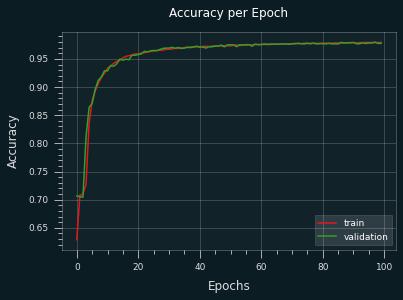

In [9]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

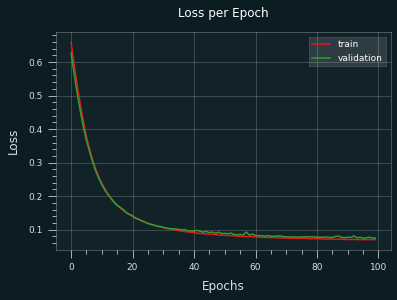

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

In [11]:
Y_train_pred = model_ann.predict(X_train)
Y_test_pred = model_ann.predict(X_test)
Y_train_pred = np.where(Y_train_pred < 0.5, 0, 1)
Y_test_pred = np.where(Y_test_pred < 0.5, 0, 1)
Y_train_pred = np.reshape(Y_train_pred, len(Y_train_pred))
Y_test_pred = np.reshape(Y_test_pred, len(Y_test_pred))
cmf_train = confusion_matrix(Y_train, Y_train_pred)
cmf_test = confusion_matrix(Y_test, Y_test_pred)

113/113 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Confusion Matrix from Training Set')

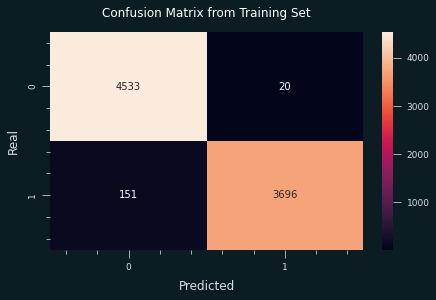

In [12]:
plt.figure(figsize=(7,4))
sns.heatmap(cmf_train, annot=True, fmt='d', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Training Set')

In [13]:
print(classification_report(Y_train, Y_train_pred, digits=5))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4553
           1       0.99      0.96      0.98      3847

    accuracy                           0.98      8400
   macro avg       0.98      0.98      0.98      8400
weighted avg       0.98      0.98      0.98      8400



Text(0.5, 1.0, 'Confusion Matrix from Test Set')

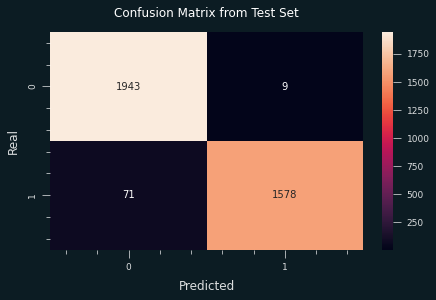

In [14]:
plt.figure(figsize=(7,4))
sns.heatmap(cmf_test, annot=True, fmt='d', linecolor='gray')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion Matrix from Test Set')

In [15]:
print(classification_report(Y_test, Y_test_pred, digits=5))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1952
           1       0.99      0.96      0.98      1649

    accuracy                           0.98      3601
   macro avg       0.98      0.98      0.98      3601
weighted avg       0.98      0.98      0.98      3601

